# Unsupervised learning - USA Arrest Data

Task 

Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data. Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.
● You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate. Try and see if you can find anything
common within each cluster that has been found.
● Push all the work that you have generated for this project to GitHub

## Exploring the data

This data set contains arrest statistics for US residents in 50 US states. The arrest types are: assault, murder, and rape and are shown per 100,000 residents. Also given, as Urbanpop, is the percentage of the population living in urban areas.

In [530]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("USArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


In [531]:
print('Number of observations: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of observations: 50 Number of features: 5


Looking at the Top and Bottom 5 entries for each feature in data

In [626]:
# Top and Bottom 5 States for Murder

print(df.sort_values(by=['Murder']).head(5))
print(df.sort_values(by=['Murder']).tail(5))

               Murder  Assault  Rape  UrbanPop(%)
State                                            
North Dakota     0.80       45  7.30           44
New Hampshire    2.10       57  9.50           56
Maine            2.10       83  7.80           51
Iowa             2.20       56 11.30           57
Vermont          2.20       48 11.20           32
                Murder  Assault  Rape  UrbanPop(%)
State                                             
South Carolina   14.40      279 22.50           48
Florida          15.40      335 31.90           80
Louisiana        15.40      249 22.20           66
Mississippi      16.10      259 17.10           44
Georgia          17.40      211 25.80           60


In [623]:
# Top and Bottom 5 States for Assault

print(df.sort_values(by=['Assault']).head(5))
print(df.sort_values(by=['Assault']).tail(5))

              Murder  Assault  Rape  UrbanPop(%)
State                                           
North Dakota    0.80       45  7.30           44
Hawaii          5.30       46 20.20           83
Vermont         2.20       48 11.20           32
Wisconsin       2.60       53 10.80           66
Iowa            2.20       56 11.30           57
                Murder  Assault  Rape  UrbanPop(%)
State                                             
New Mexico       11.40      285 32.10           70
Arizona           8.10      294 31.00           80
Maryland         11.30      300 27.80           67
Florida          15.40      335 31.90           80
North Carolina   13.00      337 16.10           45


In [624]:
# Top and Bottom 5 States for Rape

print(df.sort_values(by=['Rape']).head(5))
print(df.sort_values(by=['Rape']).tail(5))

               Murder  Assault  Rape  UrbanPop(%)
State                                            
North Dakota     0.80       45  7.30           44
Maine            2.10       83  7.80           51
Rhode Island     3.40      174  8.30           87
West Virginia    5.70       81  9.30           39
New Hampshire    2.10       57  9.50           56
            Murder  Assault  Rape  UrbanPop(%)
State                                         
Michigan     12.10      255 35.10           74
Colorado      7.90      204 38.70           78
California    9.00      276 40.60           91
Alaska       10.00      263 44.50           48
Nevada       12.20      252 46.00           81


In [625]:
# Top and Bottom 5 States for UrbanPop

print(df.sort_values(by=['UrbanPop']).head(5))
print(df.sort_values(by=['UrbanPop']).tail(5))

               Murder  Assault  Rape  UrbanPop(%)
State                                            
Vermont          2.20       48 11.20           32
West Virginia    5.70       81  9.30           39
North Dakota     0.80       45  7.30           44
Mississippi     16.10      259 17.10           44
South Dakota     3.80       86 12.80           45
               Murder  Assault  Rape  UrbanPop(%)
State                                            
Massachusetts    4.40      149 16.30           85
New York        11.10      254 26.10           86
Rhode Island     3.40      174  8.30           87
New Jersey       7.40      159 18.80           89
California       9.00      276 40.60           91


First, let us clean the data set ready for the analysis.

Let's rename UrbanPop as UrbanPop(%) to help remind as that it's a percentage and let's move it to the end for now to keep the arrest types together. Let's rename 'City' as 'States' as it contains states not cities and make it the index column. 


In [532]:
# Rename UrbanPop column

d = {'UrbanPop': 'UrbanPop(%)'}
df.rename(columns = d, inplace = True)
#df.columns 

In [533]:
# Rename City column as State

d2 = {'City': 'State'}
df.rename(columns = d2, inplace = True)
df.head()

,State,Murder,Assault,UrbanPop(%),Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


In [534]:
# Reorder columns moving UrbanPop to the far end

old_cols = df.columns.values 
new_cols= ['State', 'Murder', 'Assault', 'Rape', 'UrbanPop(%)']
df = df.reindex(columns=new_cols)


In [535]:
df = df.set_index('State') 

In [536]:
df.head()

,Murder,Assault,Rape,UrbanPop(%)
State,,,,
Alabama,13.200,236,21.200,58
Alaska,10.000,263,44.500,48
Arizona,8.100,294,31.000,80
Arkansas,8.800,190,19.500,50
California,9.000,276,40.600,91


Summarising the statistical properties of the columns:

In [537]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
Rape,21.23,9.37,7.30,46.00
UrbanPop(%),65.54,14.47,32.00,91.00


Missing Values

In [493]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

# No missing values appear

,missing
Murder,0
Assault,0
Rape,0
UrbanPop(%),0


In [494]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     int64  
 2   Rape         50 non-null     float64
 3   UrbanPop(%)  50 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


From looking at the type of each variable we can that we are working with continuous variables of floats and ints. 
We can also see the states range alphabetically from Alabama to Wyoming.

Visualising the distributions of the observations for each feature.

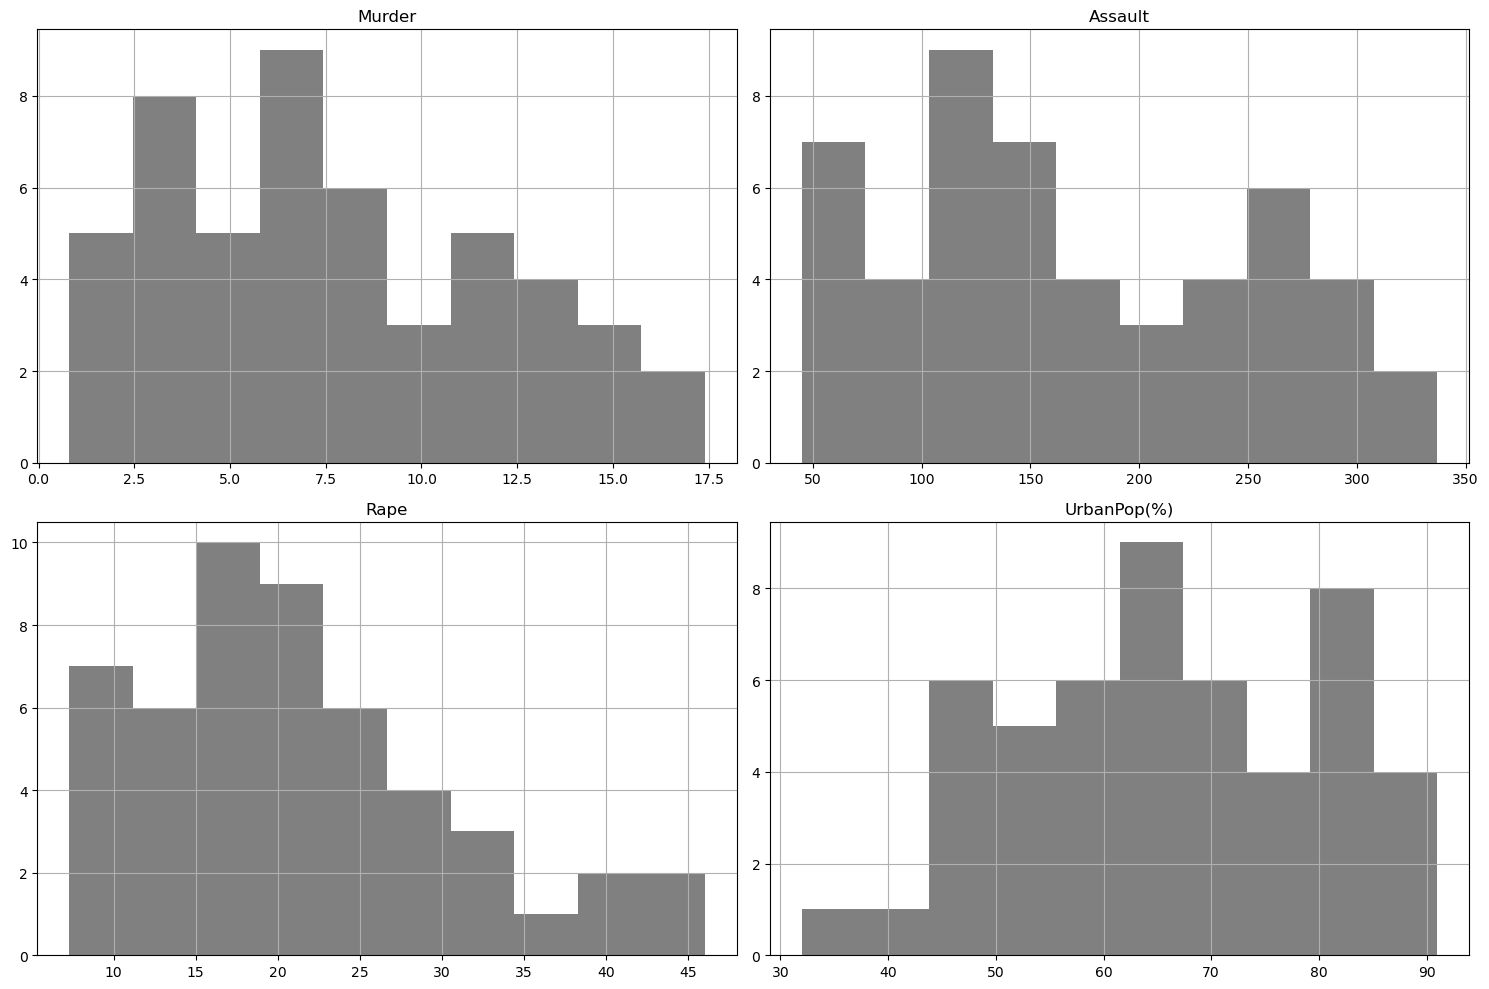

In [495]:
# Plot histograms
histograms = df.hist(color='grey', grid=True, figsize=(15, 10)) 
plt.tight_layout()
plt.show()


The histograms provides a visual representation of the data distribution. 

Looking the Murder Histogram we can see that the number of murders for most states fall in the region of approximately 6 to 7.5 arrests per 100,000. The plot is similar to the normal distribution but it seems to be right-skewed with a large number of data values on the lower half. Right-skewed distributions can usually occur when there is a boundary of 0. Here we do have a 0 boundary as we can't go lower than 0 in arrests.

Looking at the Assault Histogram we see that the number of assaults for most states fall in the region of 100 to 125 arrests per 100,000 residents.This is also right-skewed like the Murder Histogram. It is less like a normal distribution that Murder Histogram and it is almost tending to the  bimodal.

The Rape Histogram is closer to the normal distribution than the Murder Histogram but it is also right-skewed.
Most of the states' rape arrests fall in the 15 to 18 frequency per 100,000 residents.

The Urban Population Histogram is closer to the normal distribution except for around the 79-85% region.
The majority of the states have an urban population with approximately 62 to 68%. However there is a spike around the 79-85% region of urban population which is 2nd highest frequency.

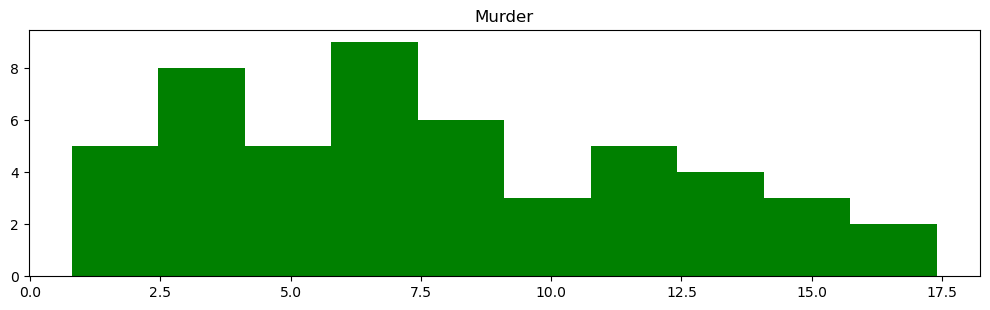

In [543]:
# Histograms can also be done for each column individually eg

histograms = df['Murder'].hist(color='green', grid=False, figsize=(10,3))
plt.tight_layout()
plt.title("Murder")
plt.show()

Statistically summary displayed in a single dataframe table:

In [497]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
Rape,0,21.23,9.37,7.30,46.00
UrbanPop(%),0,65.54,14.47,32.00,91.00


The Assault variable stands out with a mean and standard deviation higher than the other variables.
But it also has a greater minimum and maximum. 

As UrbanPop(%) is a percentage and the other features are ratios per 100,000 people it would make sense to scale the data to make it comparable, which we will look at later.

## Correlation Analysis

The 'corr' fynction in Pandas allows us to compute correlations between the different columns in a matrix. 
These are plotted below with a Seaborn heatmap plot. 

In [500]:
states = df.index
corr_df = df.corr()
labels =corr_df.columns
correlations = corr_df.corr()

C:\Users\micha\AppData\Local\Temp\ipykernel_19964\3899796050.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot:>

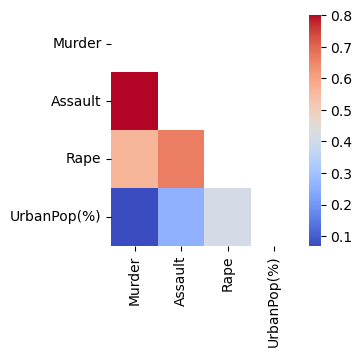

In [544]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(3,3)) 

# mask to remove the top triangular half of correlations, as these are duplicates.
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")


In this heatmap plot, the dark red or dark blue colours have a strong linear correlation between variables: Positively correlated variables are shown in red and an increase in one results in an increase in the other. Negatively correlated variables are blue and a decrease in one means an increase in the other.

From the correlation plot:
Murder and assault have a strongly positive correlation. This seems likely as murder could be considered an extreme version of assault and if you are in a state with lots of assaults it would seem logical that there would be a high number of murders compared to a state with less assaults.
Murder and rape have a fairly positive correlation.
Murder and the urban population percentage have a strongly negative correlation. This seems intuitive as there would be greater population density ...

Assault and rape have a relatively high positive correlation.
Assault and the urban population percentage have a fairly negative correlation. 

Rape and the urban population percentage have no correlation.
If we run the PCA we will be able to reduce the variables to only those which have a correlation. 

These correlations are intuitive as if you live an urban area there is more crime and more arrests. 



## Principal Components Analysis

Principal Components Analysis (PCA) finds the variables in your dataset that best differentiate the observations in the dataset so you can reduce the number of features. The PCA method finds the directions along which your data points have the most variance. These variables would dominate the analysis but with PCA their effect is greatly is reduced. 

In [545]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = df[['Murder','Assault','Rape','UrbanPop(%)']].values.reshape(-1,4)

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


Correlations between the components and original variables are shown below using the components_ method of our PCA() object.

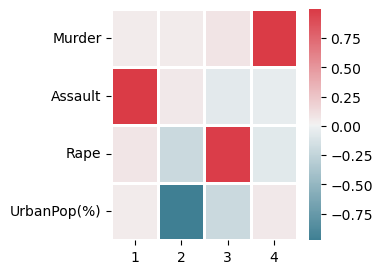

In [505]:
nr_comps = 4
fig, ax = plt.subplots(figsize=(3,3)) 
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

Component 1 has a high positive correlation with Assault
Component 2 has a high negative correlation with Urban Population Percentage
Component 3 has a high positive correlation with Rape
Component 4 has a high positive correlation with Murder

In [509]:
# Creating a Biplot of Principle Component 1 and Principle Component 2

def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(25, 20))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

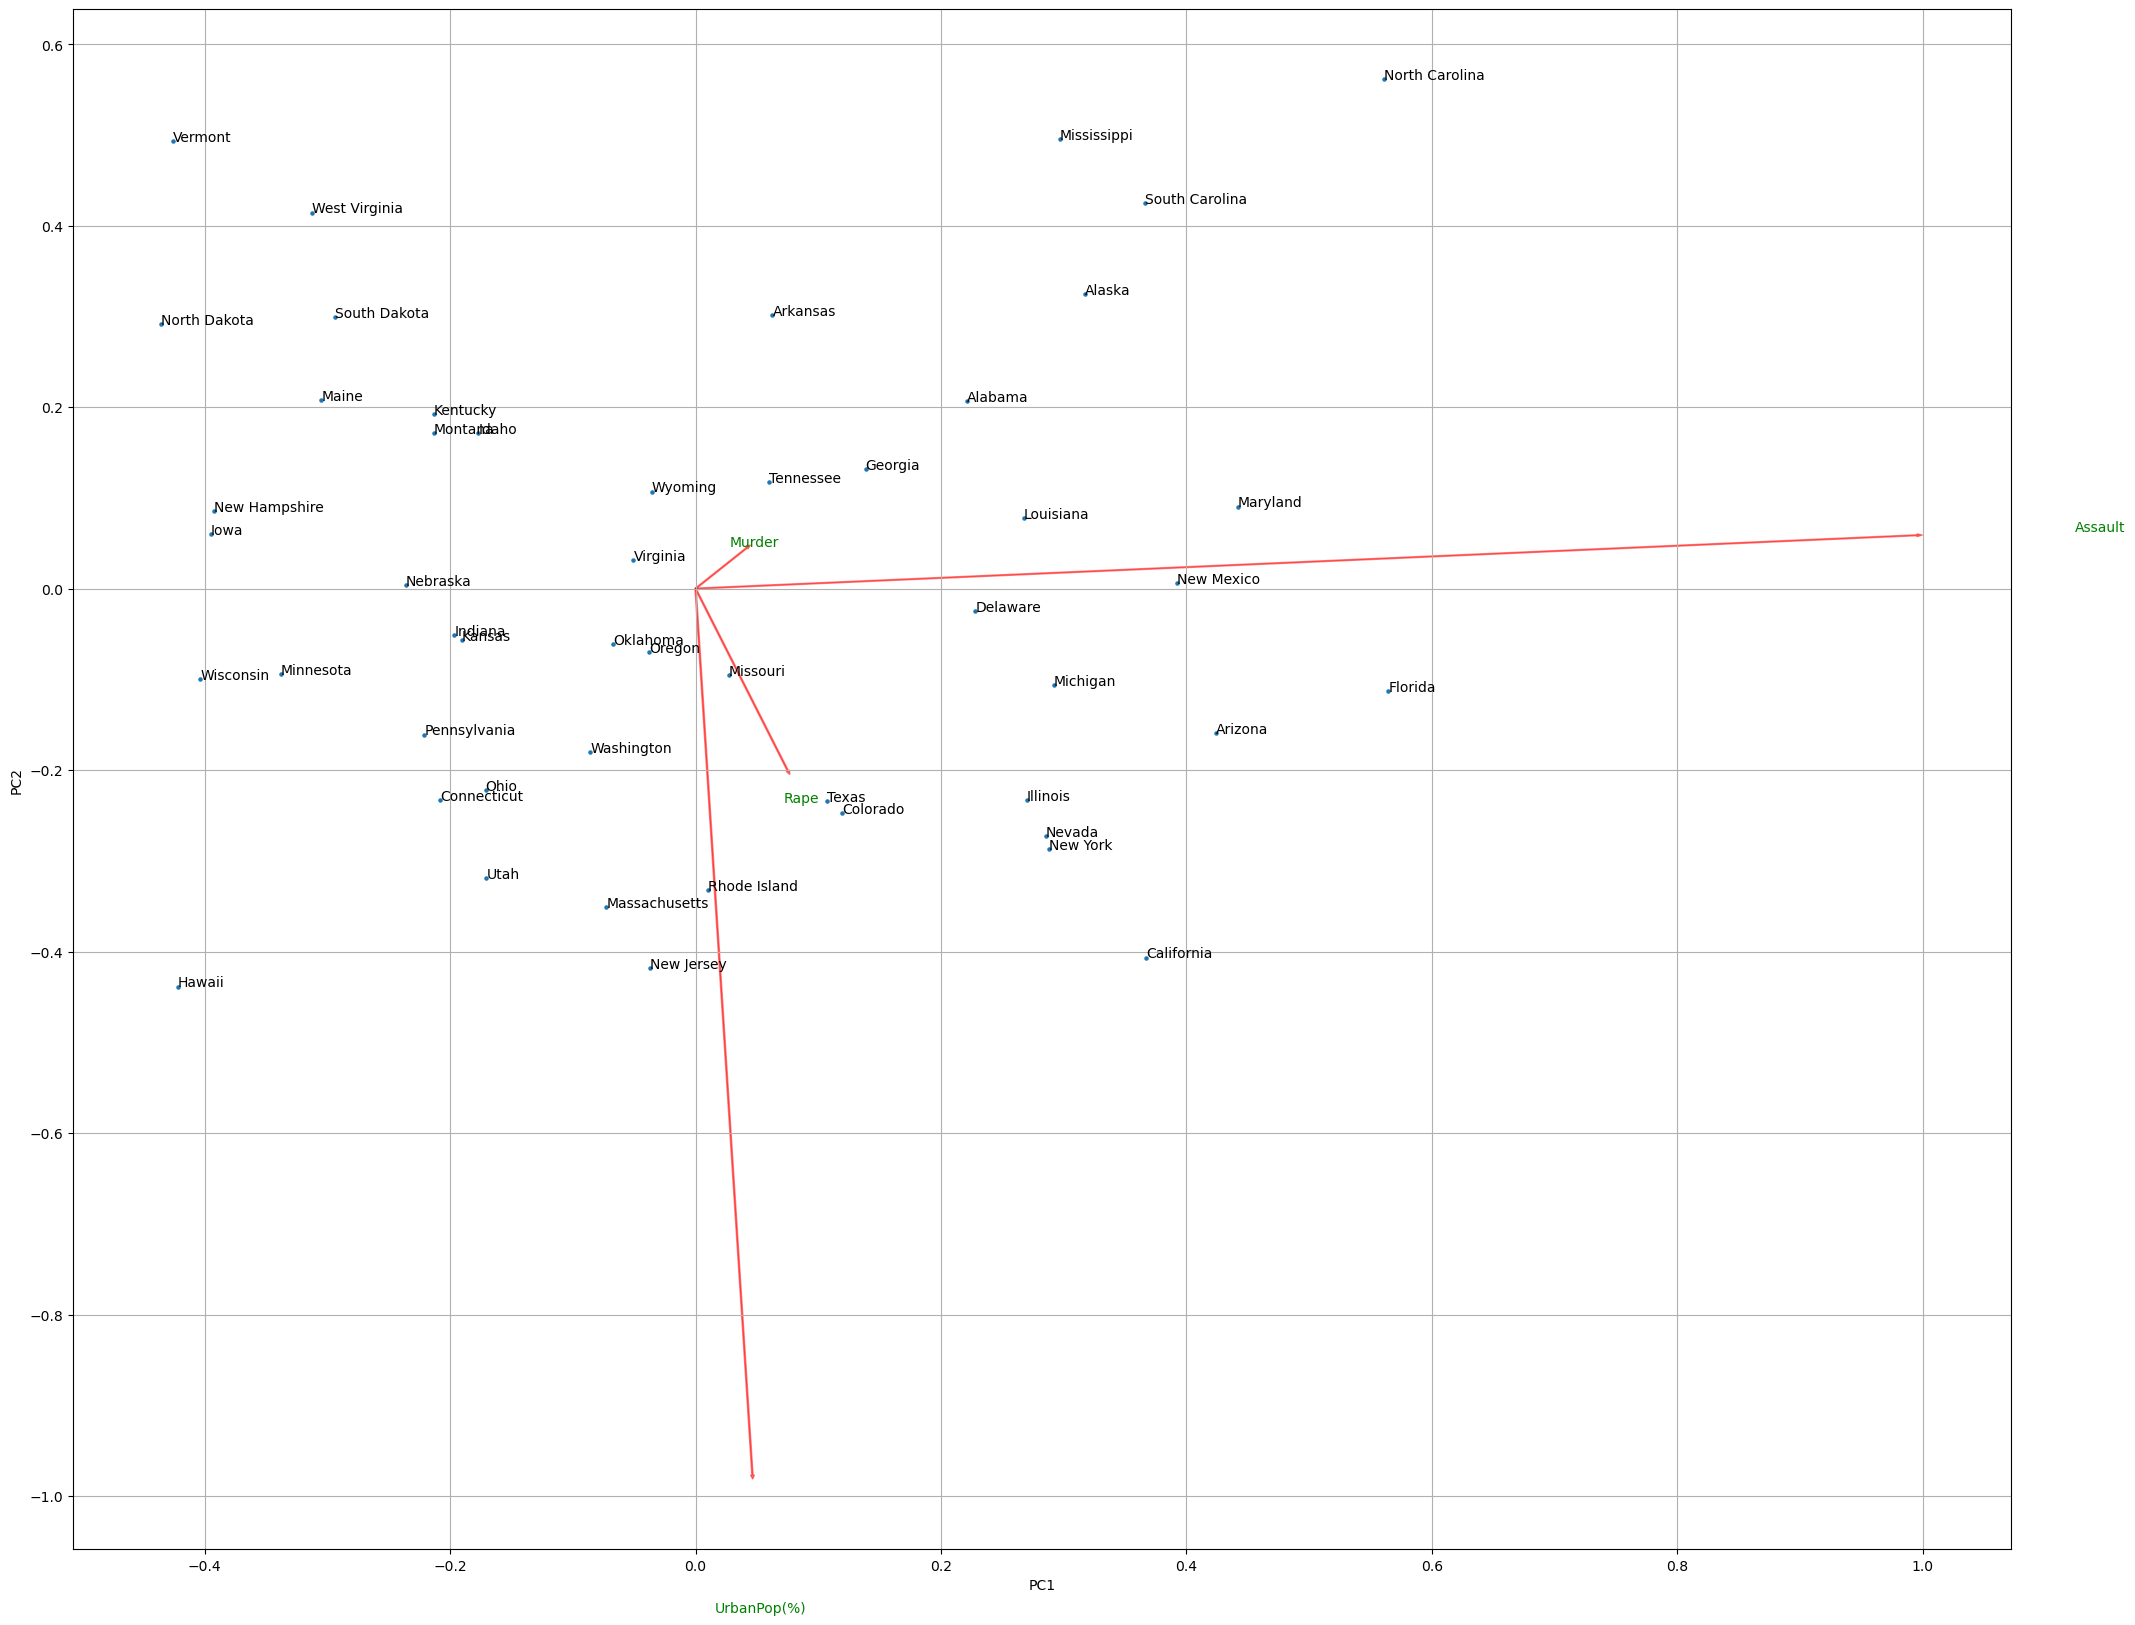

In [551]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

Each point on a biplot is a projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot.

The UrbanPop(%) and the Assault features have the largest lines on this plot. This shows that they are the most important features. 

This information is also shown in tabular form below with the values.

In [511]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,Rape,0.075,0.201
3,UrbanPop(%),0.046,0.977


We see that Assault has the highest importance in the first principle component. The other variables have a really low importance in the first principle component. 

Urban Population has the most importance in the second principle component.
Rape is the 2nd bout it's still quite low. The other variables are really low in importance in the second principle component

These observations agree with those from the biplot. 

Going back to the mean values for the Assault and UrbanPop features we see that they are much larger numbers than those for the other features, Murder and Rape. It is likely that because of this Assault and UrbanPop drown out the other features and these other features get ignored. To minimise this impace we can standardise the data.

### Standardised data

We standardise the data so that some features do not drown out the others.

In [546]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.99,1.13,-0.44,0.16
1,1.95,1.07,2.04,-0.44
2,1.76,-0.75,0.05,-0.83
3,-0.14,1.12,0.11,-0.18
4,2.52,-1.54,0.60,-0.34


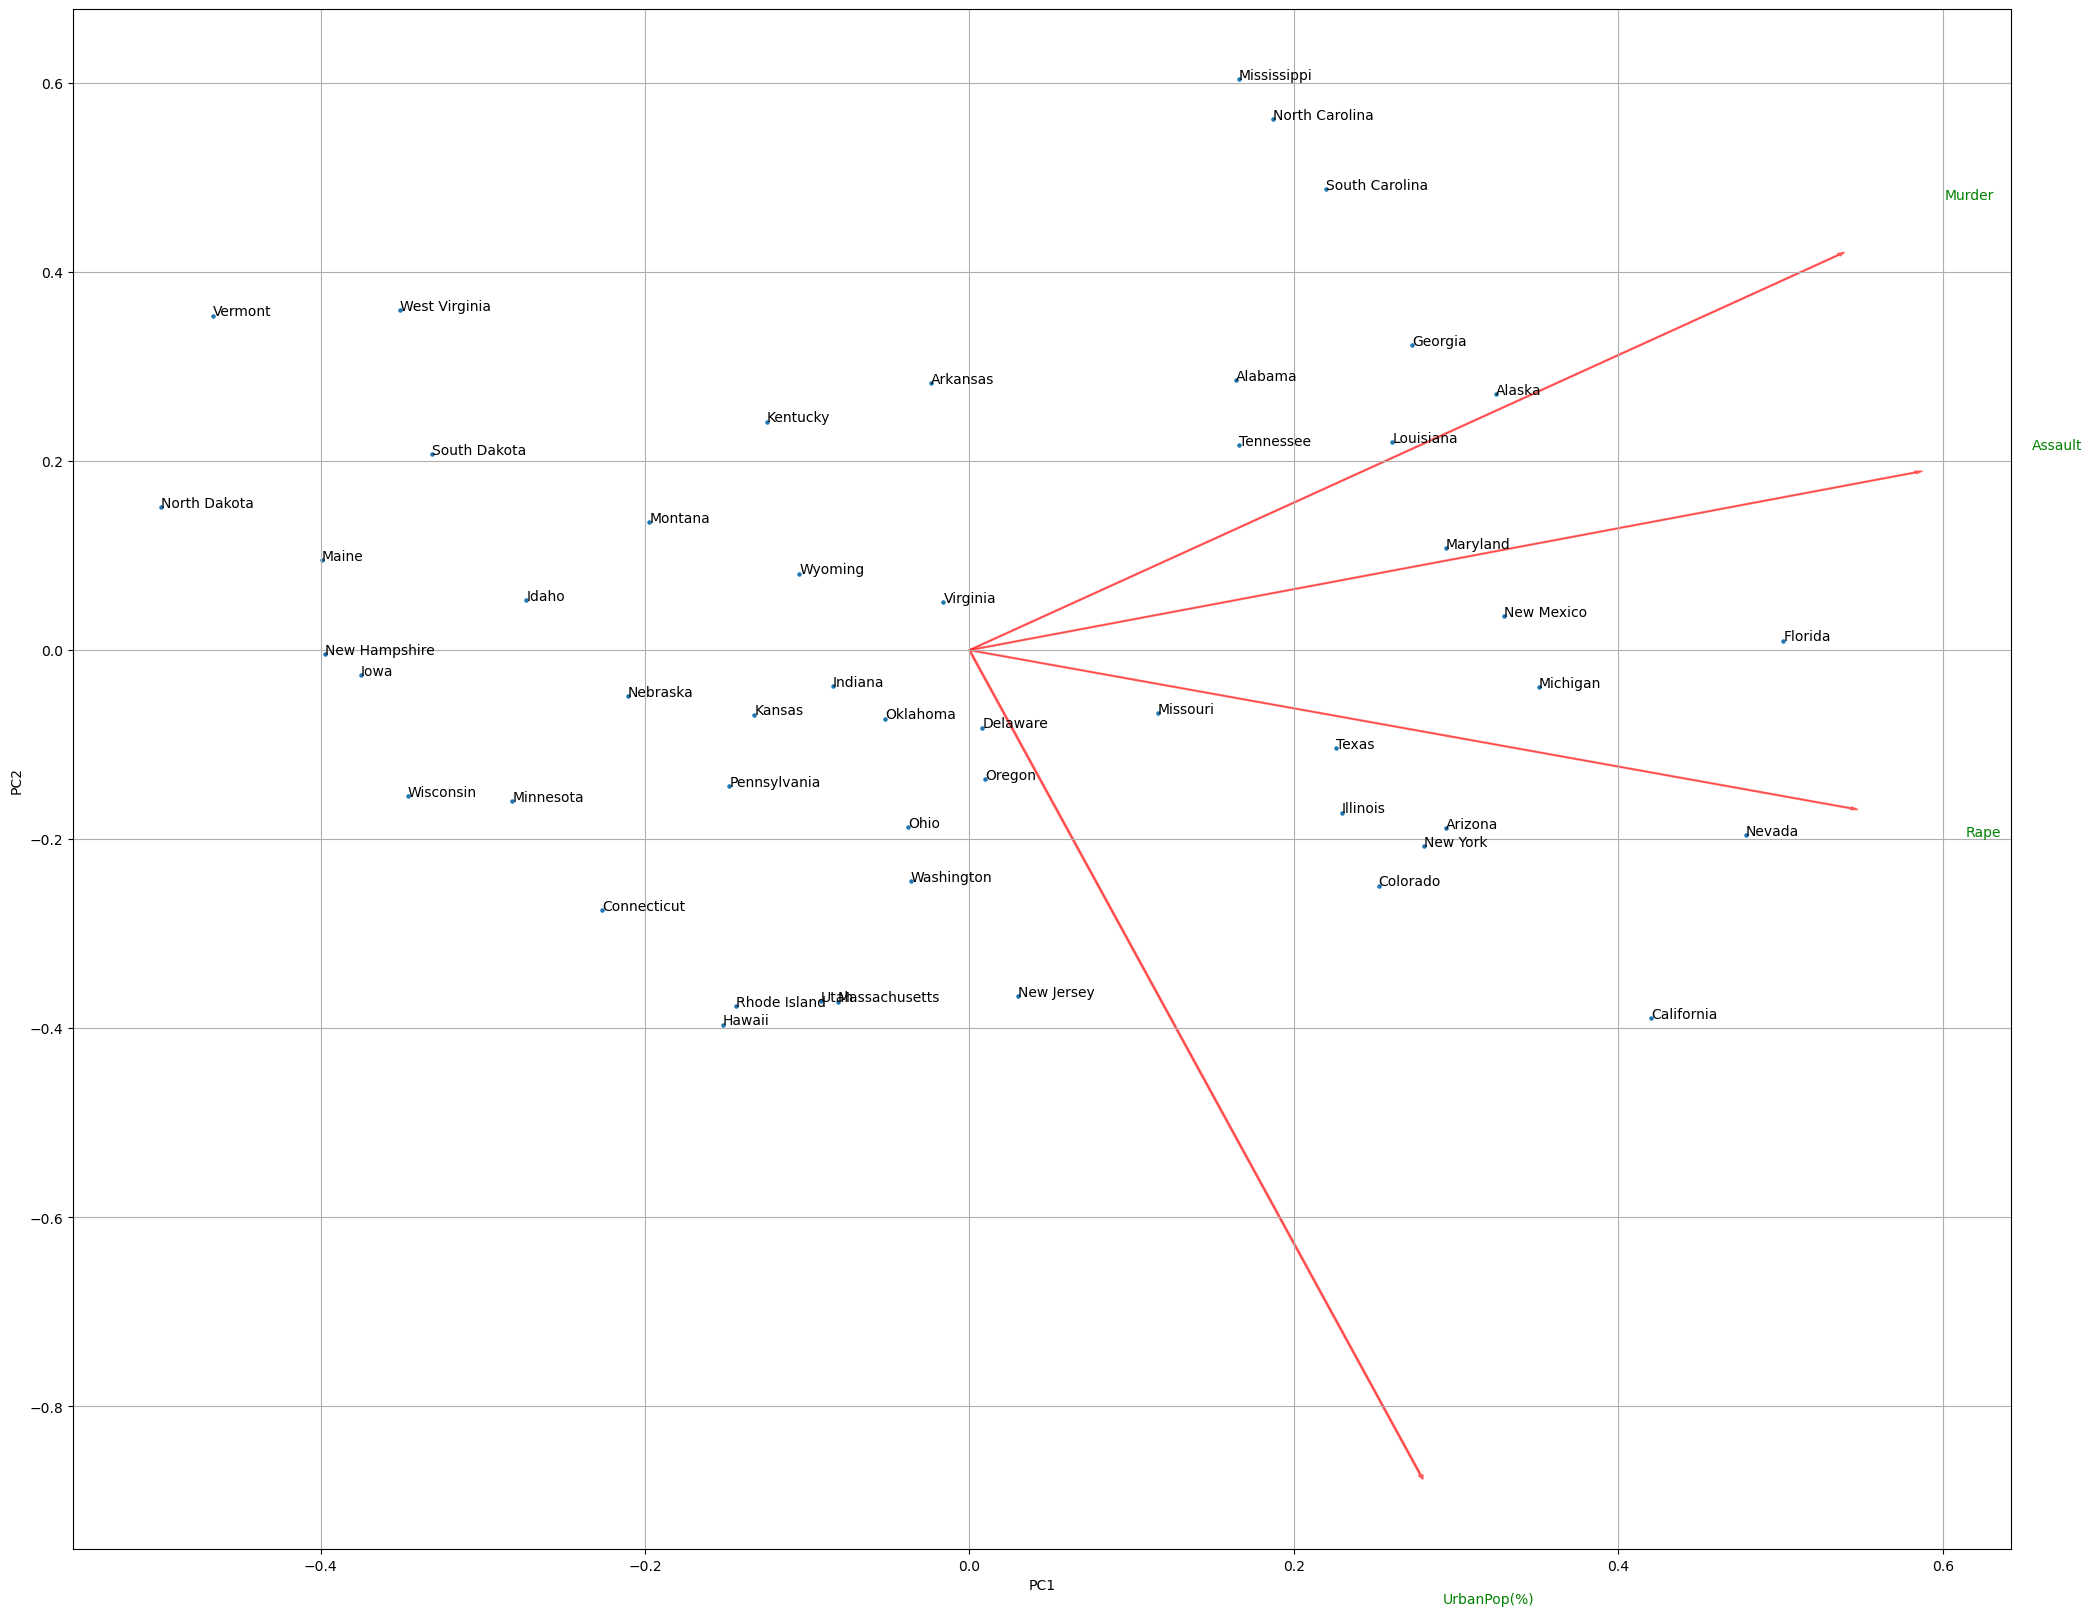

In [592]:
# Creating a Biplot of Principle Component 1 and Principle Component 2 - Standardised Data Version

biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

We can immediately see that the standardised data results in far more variables being used to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [553]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.54,0.42
1,Assault,0.58,0.19
2,Rape,0.54,0.17
3,UrbanPop(%),0.28,0.87


Looking at the PC1 feature importance now, we see that the Murder, Assault and Rape variables contribute fairly evenly and the importance of UrbanPop(%) contribution has been boosted.
For PC2 the main contribution is UrbanPop(%). Murder has been boosted and Rape has reduced.

Cumulative Explained Variance

The below plot shows the cumulative explained variance for the number of components. 
We can see that with our 2 components our model is able to explain 87% of the variance in the data 
At 87% it is a good fit to the data and would provide good predictions.

Text(0.5, 1.0, 'Cumulative Explained Variance')

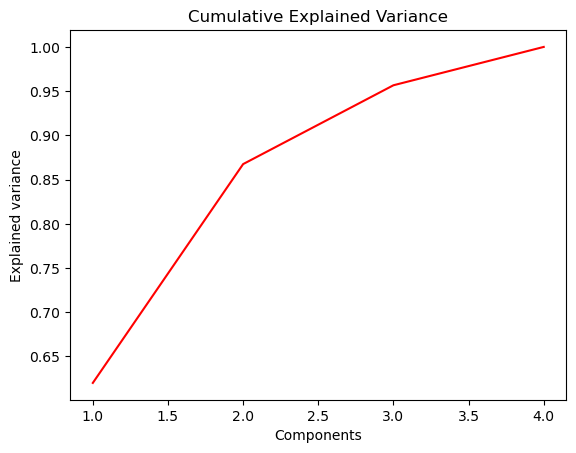

In [554]:
# The explained_variance_ratio_ can evaluate the performance of the model

# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

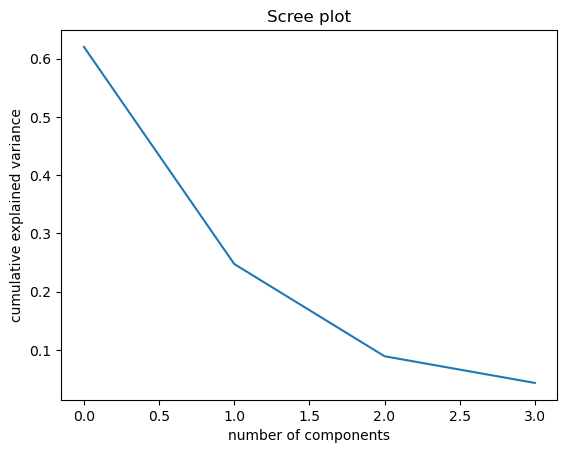

In [555]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

Scree Test

In the above Scree plot results, the first 2 principal components have cumulative explained variances values greater than 0.1. 
These 2 components explain 87% of the variation in the data. The scree plot shows that a straight line is being formed after the 2nd principal component.
 
87% is a good amount of variation explained in the data so we can use the first 2 principal components.We can use these to perform cluster analysis.

We have performed dimensional reduction here reducing our 4 variables down to 2 to explaining most of the variability.


In [564]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2,3
State,,,,
Alabama,0.99,1.13,-0.44,0.16
Alaska,1.95,1.07,2.04,-0.44
Arizona,1.76,-0.75,0.05,-0.83
Arkansas,-0.14,1.12,0.11,-0.18
California,2.52,-1.54,0.60,-0.34


## Hierarchical clustering


In Hierachical clustering shows clusters without us having to specify the number of clusters to split the data into.

The plots belows shows Dendrograms using the Average and Complete Linkage Methods. 

In the plots, the Euclidean distance (the default) is used for measuring the distance between points.

In order to determine the best linkage method the complete and average linkage method are shown below.
(A Dendrogram using the Single Linkage Method is not displayed as it only showed 1 cluster)

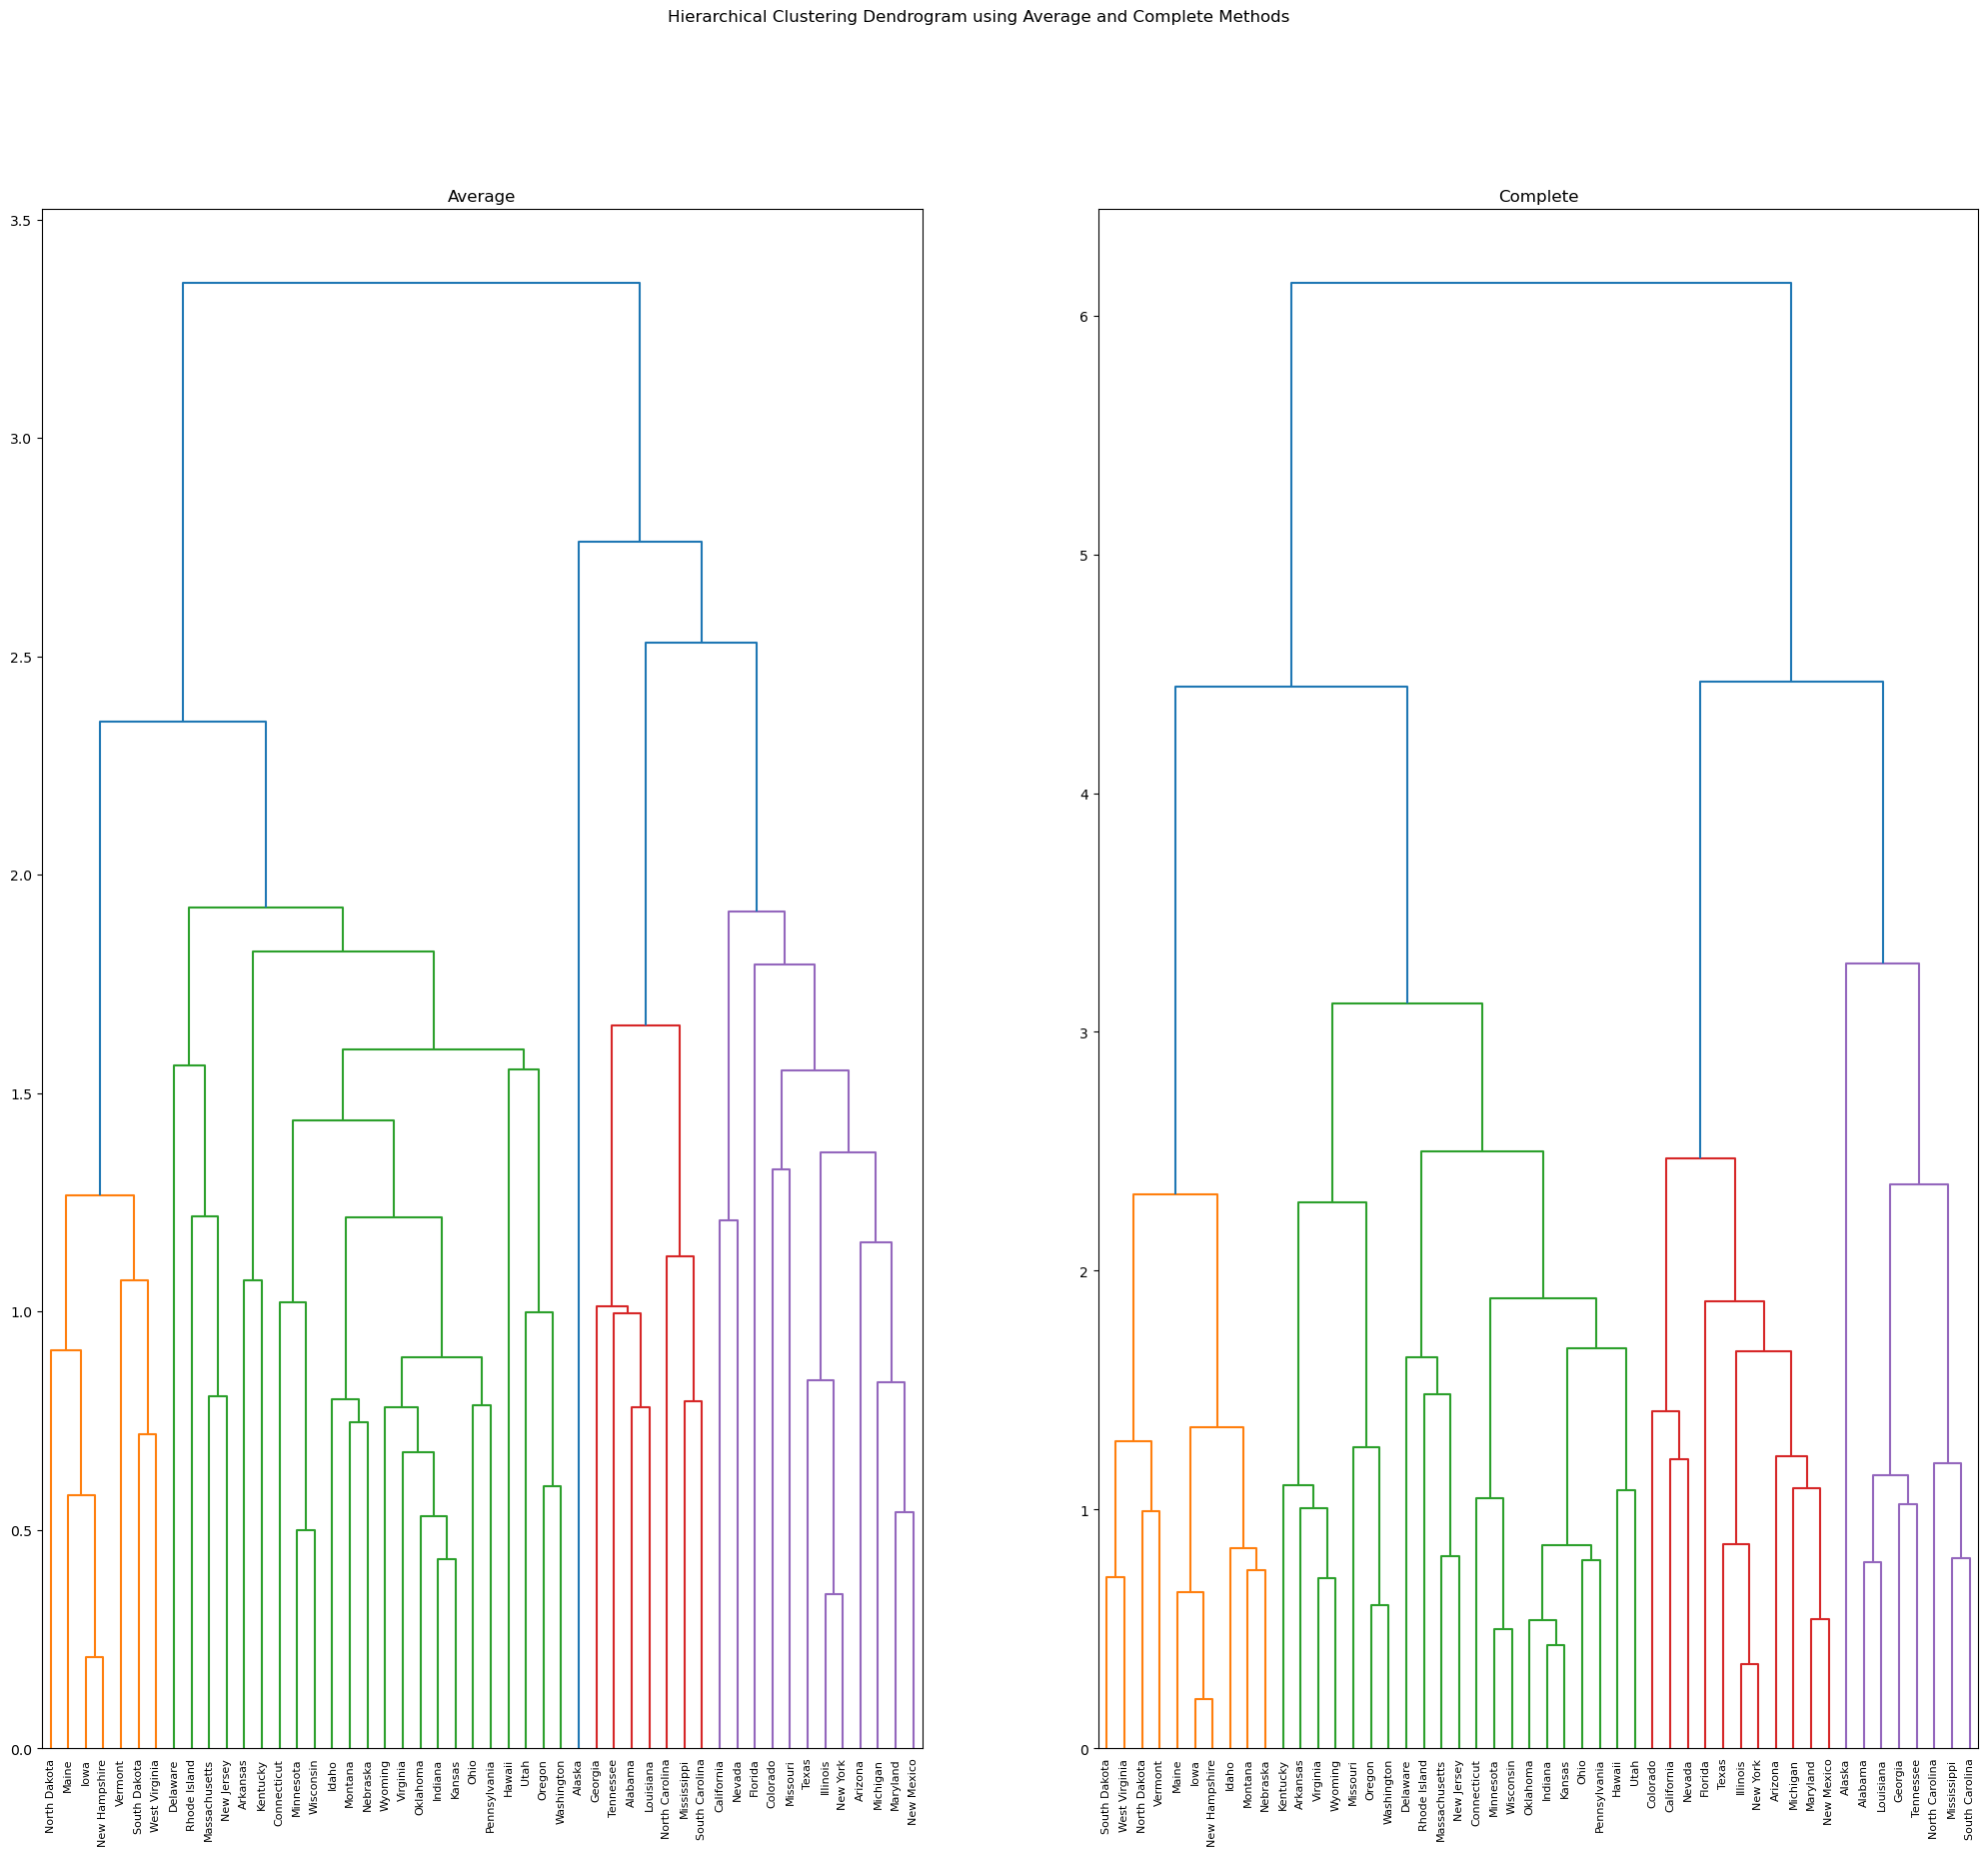

In [561]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 20))
fig.suptitle('Hierarchical Clustering Dendrogram using Average and Complete Methods')
ax1.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax1)
ax2.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax2)
plt.show()

The complete linkage dendrogram shows 4 clear clusters whereas the average linkage dendrogram shows 5, which one of those containing 1 state - Alaska. So as the complete linkage dendrogram shows the most balanced dispersion of clusters let's continue the analysis with the complete linkage dendrogam. A clearer dendrogram for the complete linkage method is shown below.

Complete linkage method is good when clusters are distinct and well-separated whereas the average linkage method is good when there is some overlapping, or when the aim is to identify more general patterns in the data.

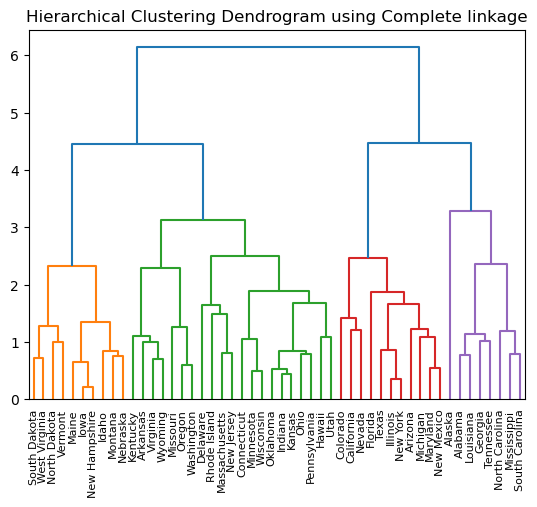

In [566]:
plt.title("Hierarchical Clustering Dendrogram using Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

Need analysis here

With k=4, the clusters are of size 10, 21, 11 and 8 respectively. 

Within the orange cluster, the right-most branch at height 1.3 contains states with the
lowest urban population percentage: South Dakota, West Virginia, North Dakota and Vermont.
These also features in the top 5 for lowest murder rates.
All of the orange cluster fall  in the lower half for urban population percentage, murder, assaults and rapes.

Within, the largest cluster, the green cluster we have New Jersey, Massachusetts and Rhode Island. These are in the top 5 for
urban population percentage. The rest of the green cluster all seem to be spread around the median, inbetween the lower and upper interquartile range for murder, assault, rape and urban population percentage.

The red clusters have New York, New Mexico, Texas, Florida etc tend to be in the upper and highest areas in the dataset for urban population percentage. So these are amongst the most densely populated states and their murder rates are tending to almost the highest rates in the dataset. Theey are also in the upper quartiles for rape and assault.

The purple clusters, except for Alaska, seem to be based in the South. These are in the lowest half of the data for urban population percentage but are in the upper quartiles for murder, rape and assault. They have 7 out of 8 in the top 8 for the highest murder rate. We need to look more into this but I could speculate that these are the states which have higher gun sales. 

### K-means clustering

K-means is a fast and efficient clustering partitioning algorithm that can be used on large datasets. 
Disadvantage are that it can be affected by noise data, outliers the fact that you need to specify K in advance.

The K-means algorithm finds a cluster centre which is the mean of the points in that cluster. 
Each point is closer its cluster centre than to the other cluster centres. 
 
A visualisation of the clusters with K set to 4 is shown in the figure below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


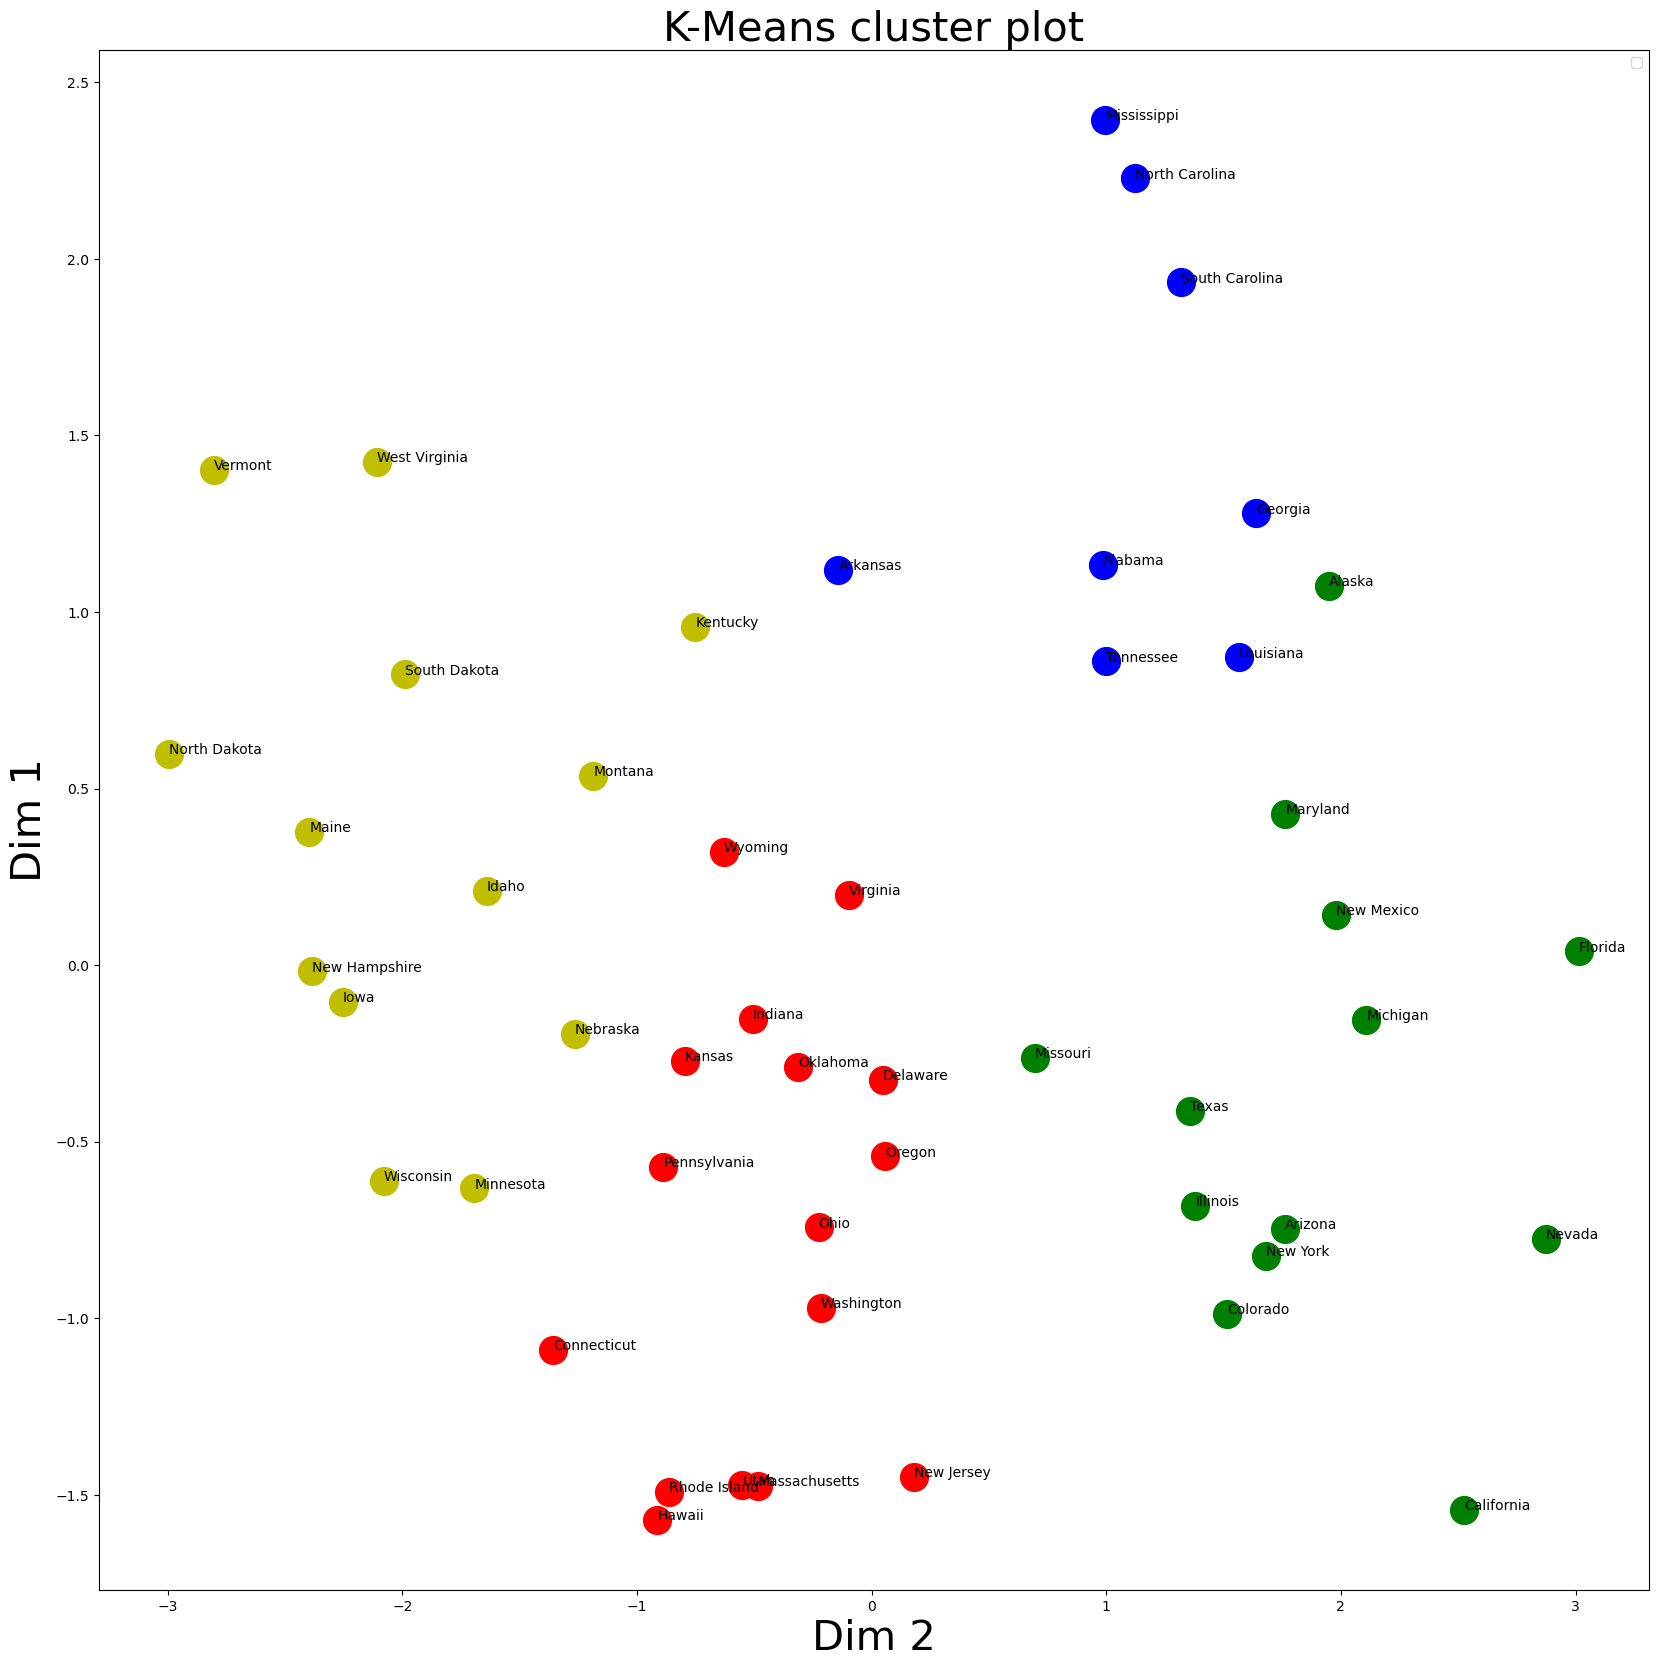

In [635]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_


# Plot clusters
fig, ax = plt.subplots(figsize=(20, 20))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i], s=400) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))

plt.xlabel('x-axis',fontsize=30)     
plt.ylabel('y-axis',fontsize=30)
ax.set_title("K-Means cluster plot", fontsize=30)
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [574]:
# Groups
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]
group3_indices = np.argwhere(cluster_labels==3).transpose()[0]

group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]
group2 = np.array(states)[group2_indices]
group3 = np.array(states)[group3_indices]

print(f" Group 0: {group0}\n\n")
print(f" Group 1: {group1}\n\n")
print(f" Group 2: {group2}\n\n")
print(f" Group 3: {group3}\n\n")

 Group 0: ['Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas' 'Massachusetts'
 'New Jersey' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'Utah' 'Virginia' 'Washington' 'Wyoming']


 Group 1: ['Alabama' 'Arkansas' 'Georgia' 'Louisiana' 'Mississippi' 'North Carolina'
 'South Carolina' 'Tennessee']


 Group 2: ['Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Illinois'
 'Maryland' 'Michigan' 'Missouri' 'Nevada' 'New Mexico' 'New York' 'Texas']


 Group 3: ['Idaho' 'Iowa' 'Kentucky' 'Maine' 'Minnesota' 'Montana' 'Nebraska'
 'New Hampshire' 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia'
 'Wisconsin']




Group 0 is the largest cluster. These are in the top 5 for urban population percentage. The rest of the cluster all seem to be spread around the median, inbetween the lower and upper interquartile range for murder, assault, rape and urban population percentage. 3 of the top 5 highest states for urban population fall into the Group 0 cluster: New Jersey, Rhode Island and Massachusetts

Group 1 is the Southern states we encountered in the PCN clustering earlier. These had the highest for murder rates but quite low, comparatively, on the urban population percentage, showing in the lowest half of the data. They have 7 out of 8 in the top 8 for the highest murder rate. Possibly these states which have higher gun sales and higher acceptance of having a gun.

Group 2 tend to be in the upper and highest areas in the dataset for urban population percentage. So these are amongst the most densely populated states and their murder rates are tending to almost the highest rates in the dataset. 2 of the top 5 highest states for urban population fall into the Group 2 cluster: California and New York.

Group 3 contains states with the lowest urban population percentage: South Dakota, West Virginia, North Dakota and Vermont.
These also features in the top 5 for lowest murder rates.
Generally this cluster falls in the lower half for urban population percentage, murder, assaults and rapes and so it's probably the best area to live in to avoid crime. 4 of the 5 lowest states for urban population fall into the Group 3 cluster: Vermont, West Virginia, North Dakota and South Dakota. 

Both hierarchical clustering and K-means grouped the states together similarly.
Alaska however was seen grouped in a different group in the PCN to here.